In [1]:
!pip install networkx matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving modulos.txt to modulos.txt


Grafo de la Estacion Espacial


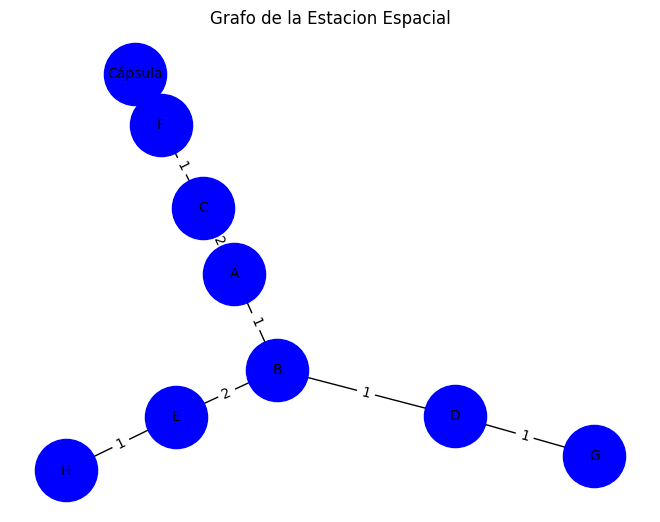

Ruta mas corta y segura: ['A', 'C', 'F', 'Cápsula']


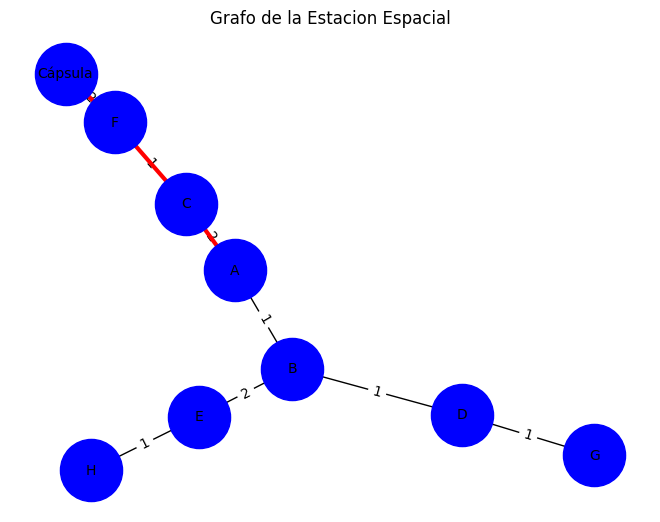

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

#Implementé un grafo no dirigido con la librería NetworkX,
#donde los nodos representan módulos de la estación espacial y las aristas,
#pasillos con un peso según su dificultad.
#Para hallar la ruta más segura hacia la Cápsula de Escape,
#utilicé el algoritmo de Dijkstra, que encuentra el camino de menor dificultad
#acumulada. Este método es eficiente, con una complejidad de (O((n + m) log n)).

def leer_grafo(nombre_archivo):
    G = nx.Graph()
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            mod1, mod2, dif = linea.strip().split()
            if int(dif) > 0:
                G.add_edge(mod1, mod2, weight=int(dif))
    return G

def dibujar_grafo(G, ruta_optima=None):
    pos = nx.spring_layout(G)
    etiquetas = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="blue", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas)

    if ruta_optima:
        path_edges = list(zip(ruta_optima, ruta_optima[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Grafo de la Estacion Espacial")
    plt.show()

def encontrar_ruta_mas_segura(G, origen, destino):
    try:
        ruta = nx.dijkstra_path(G, origen, destino, weight='weight')
        return ruta
    except nx.NetworkXNoPath:
        return []

if __name__ == "__main__":
    G = leer_grafo("modulos.txt")
    print("Grafo de la Estacion Espacial")
    dibujar_grafo(G)

    origen = "A"
    destino = "Cápsula"
    ruta = encontrar_ruta_mas_segura(G, origen, destino)
    print("Ruta mas corta y segura:", ruta)

    dibujar_grafo(G, ruta_optima=ruta)